In [73]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [74]:
df = pd.read_csv('../Data/01-modified-data/cardiovascular_numeric_final.csv')
df = df.drop(df.columns[0], axis=1)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,168,62,110,80,1,1,0,0,1,0,21.97
1,1,55,1,156,85,140,90,3,1,0,0,1,1,34.93
2,2,52,1,165,64,130,70,3,1,0,0,0,1,23.51
3,3,48,2,169,82,150,100,1,1,0,0,1,1,28.71
4,4,48,1,156,56,100,60,1,1,0,0,0,0,23.01


In [75]:
numerical_cols = ["age", "height", "weight", "ap_hi", "ap_lo", "bmi"]
X = df[numerical_cols]
Y = df['cardio']
print(X)

       age  height  weight  ap_hi  ap_lo    bmi
0       50     168      62    110     80  21.97
1       55     156      85    140     90  34.93
2       52     165      64    130     70  23.51
3       48     169      82    150    100  28.71
4       48     156      56    100     60  23.01
...    ...     ...     ...    ...    ...    ...
64801   54     172      70    130     90  23.66
64802   58     165      80    150     80  29.38
64803   53     168      76    120     80  26.93
64804   61     163      72    135     80  27.10
64805   56     170      72    120     80  24.91

[64806 rows x 6 columns]


In [76]:
# Standardizing the features
scaler = StandardScaler()
df_std = scaler.fit_transform(X)

In [77]:
# Applying PCA to the data
pca = PCA()
pca.fit(df_std)

PCA()

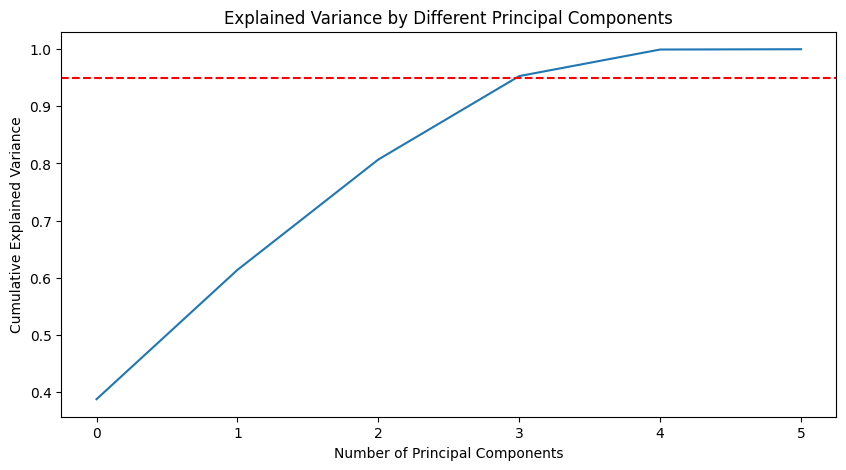

In [78]:
# Determine the optimal number of principal components to retain
# You can use a scree plot and look for the "elbow" or use the explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')  # for 95% variance
plt.title('Explained Variance by Different Principal Components')
plt.show()

In [ ]:
# Choose the number of components such that at least 95% variance is retained
optimal_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1

# Reduce the data dimensions
pca_opt = PCA(n_components=optimal_components)
df_reduced = pca_opt.fit_transform(df_std)

1st & 2nd

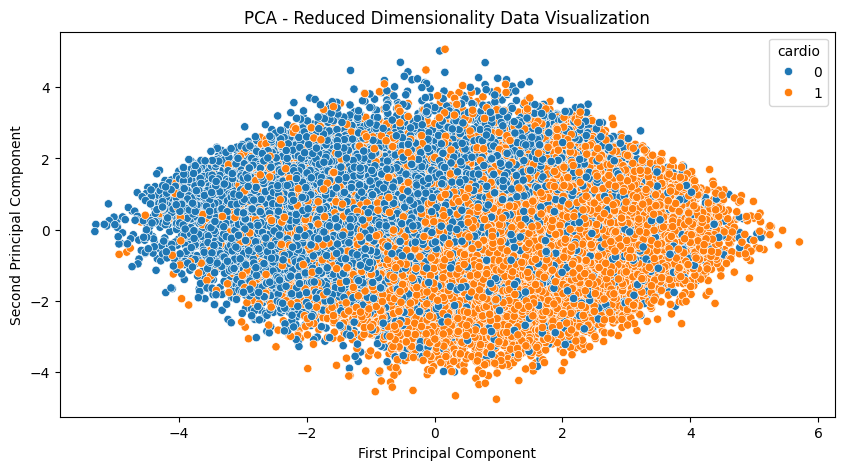

In [88]:
# Visualize the reduced-dimensional data using PCA
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_reduced[:, 0], y=df_reduced[:, 1], hue=Y,color='cyan')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - Reduced Dimensionality Data Visualization')
plt.show()

2nd & 3 

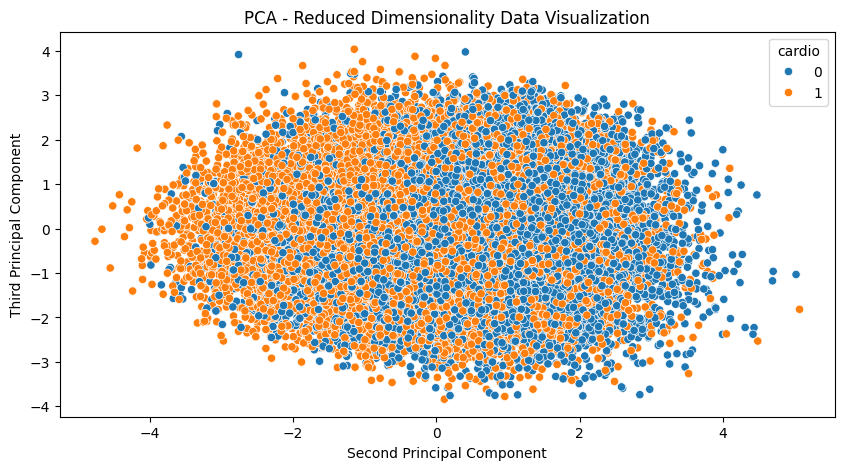

In [87]:
# Visualize the reduced-dimensional data using PCA
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_reduced[:, 1], y=df_reduced[:, 2], hue=Y,color='cyan')
plt.xlabel('Second Principal Component')
plt.ylabel('Third Principal Component')
plt.title('PCA - Reduced Dimensionality Data Visualization')
plt.show()

3rd & 4th

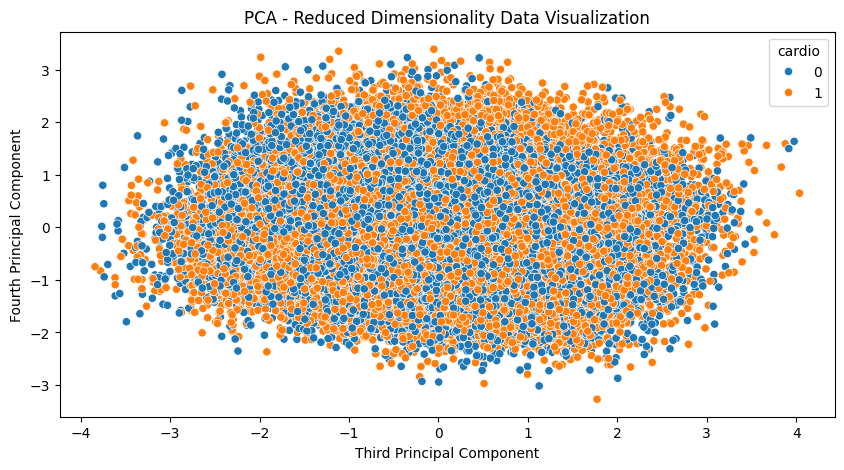

In [86]:
# Visualize the reduced-dimensional data using PCA
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_reduced[:, 2], y=df_reduced[:, 3], hue=Y,color='cyan')
plt.xlabel('Third Principal Component')
plt.ylabel('Fourth Principal Component')
plt.title('PCA - Reduced Dimensionality Data Visualization')
plt.show()

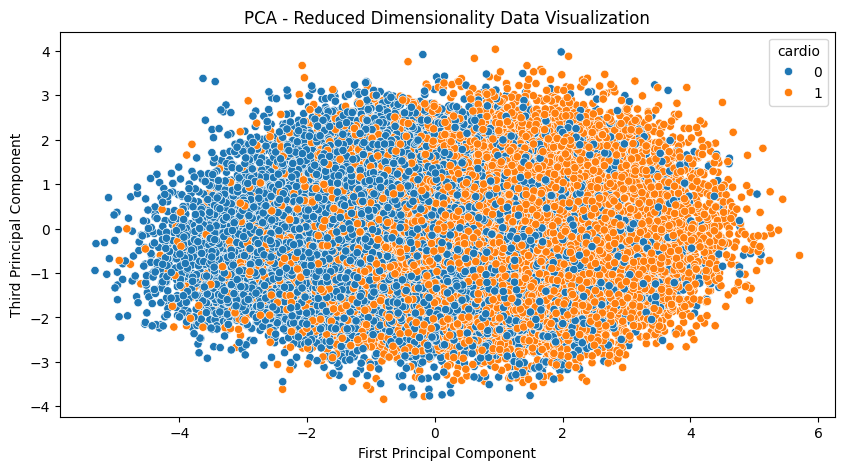

In [106]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_reduced[:, 0], y=df_reduced[:, 2], hue=Y,color='cyan')
plt.xlabel('First Principal Component')
plt.ylabel('Third Principal Component')
plt.title('PCA - Reduced Dimensionality Data Visualization')
plt.show()

In [85]:
# Analyze and interpret the results (This is just a placeholder for the analysis)
# Example: Print the explained variance by each component
for i, variance in enumerate(pca_opt.explained_variance_ratio_):
    print(f"Principal Component {i+1}: {variance:.2%} of the variance")

# Print the optimal number of components
print(f"Optimal number of components: {optimal_components}")

Principal Component 1: 38.71% of the variance
Principal Component 2: 22.64% of the variance
Principal Component 3: 19.33% of the variance
Principal Component 4: 14.61% of the variance
Optimal number of components: 4


T-SNE

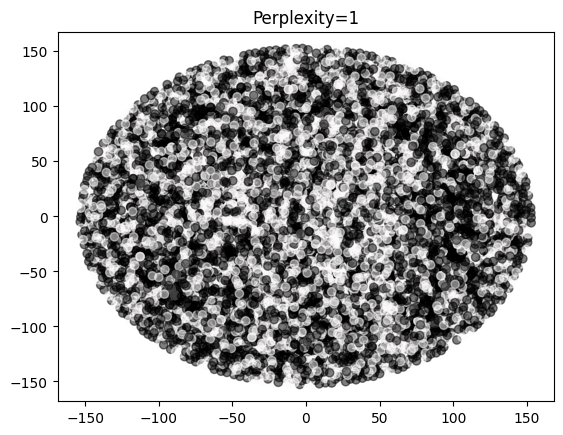

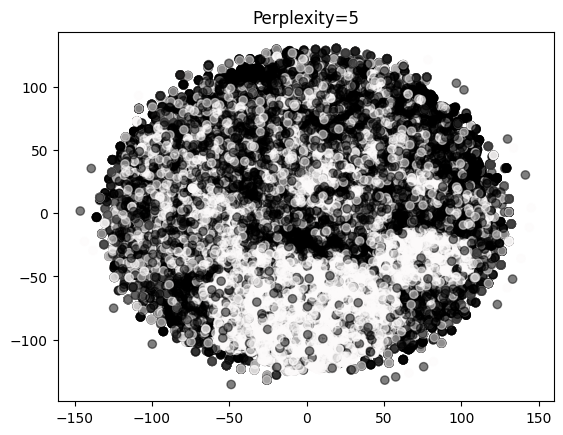

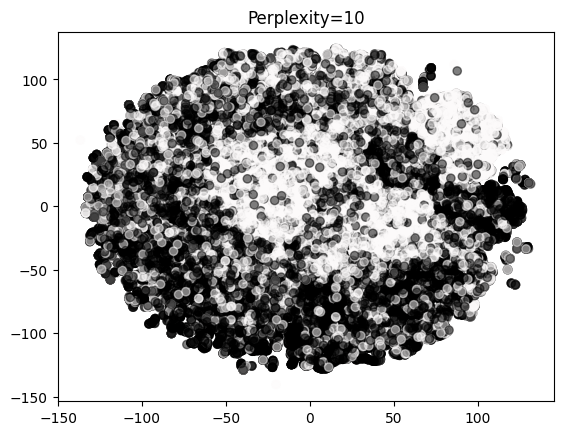

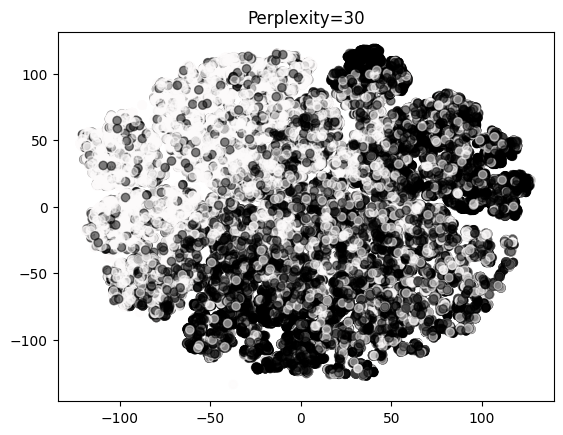

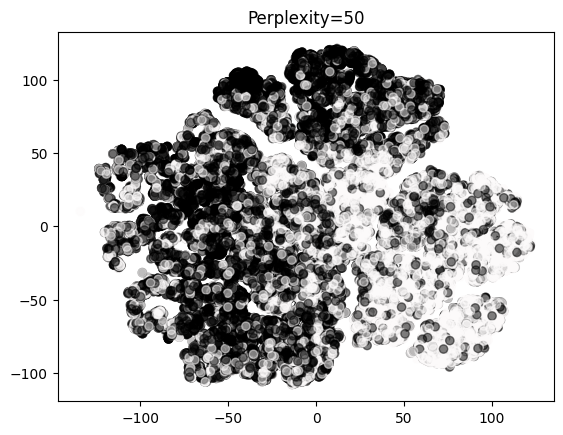

In [103]:

for i in (1,5,10,30,50):
    X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=i).fit_transform(df_std)
    plt.scatter(X_embedded[:,0],X_embedded[:,1],c=Y, alpha=0.5,cmap='gist_earth')
    plt.title(f"Perplexity={i}")
    plt.show()